#DATA PREPROCESSING

In [1]:
import io
from google.colab import files
import pandas as pd


uploaded = files.upload()
print(uploaded.keys())
dataset = pd.read_csv(io.BytesIO(uploaded['historicdata.csv']))


Saving historicdata.csv to historicdata.csv
dict_keys(['historicdata.csv'])


In [2]:
dataset

,Date Time,Date Time(RAW),Traffic Total (Volume),Traffic Total (Volume)(RAW),Traffic Total (Speed),Traffic Total (Speed)(RAW),Traffic In (Volume),Traffic In (Volume)(RAW),Traffic In (Speed),Traffic In (Speed)(RAW),Traffic Out (Volume),Traffic Out (Volume)(RAW),Traffic Out (Speed),Traffic Out (Speed)(RAW),Downtime,Downtime(RAW),Coverage,Coverage(RAW)
0,3/13/2024 12:00:00 AM - 1:00:00 AM,45363.750000,965 MB,1.012056e+09,2.25 Mbit/s,281149.9691,768 MB,8.055671e+08,1.79 Mbit/s,223787.2815,197 MB,2.064885e+08,0.46 Mbit/s,57362.6876,0 %,0.0,100 %,9999.0
1,3/13/2024 1:00:00 AM - 2:00:00 AM,45363.791667,155 MB,1.626336e+08,0.36 Mbit/s,45179.5195,150 MB,1.574069e+08,0.35 Mbit/s,43727.5520,4.98 MB,5.226677e+06,0.01 Mbit/s,1451.9675,0 %,0.0,100 %,9999.0
2,3/13/2024 2:00:00 AM - 3:00:00 AM,45363.833333,9.14 MB,9.583243e+06,0.02 Mbit/s,2662.2190,6.74 MB,7.068766e+06,0.02 Mbit/s,1963.6988,2.40 MB,2.514477e+06,NaN,698.5203,0 %,0.0,100 %,9999.0
3,3/13/2024 3:00:00 AM - 4:00:00 AM,45363.875000,9.33 MB,9.786984e+06,0.02 Mbit/s,2718.8256,6.94 MB,7.281575e+06,0.02 Mbit/s,2022.8226,2.39 MB,2.505409e+06,NaN,696.0030,0 %,0.0,100 %,9999.0
4,3/13/2024 4:00:00 AM - 5:00:00 AM,45363.916667,9.91 MB,1.038825e+07,0.02 Mbit/s,2885.8907,7.36 MB,7.714746e+06,0.02 Mbit/s,2143.1815,2.55 MB,2.673508e+06,NaN,742.7092,0 %,0.0,100 %,9999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,3/27/2024 9:00:00 PM - 10:00:00 PM,45378.625000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 %,0.0
358,3/27/2024 10:00:00 PM - 11:00:00 PM,45378.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 %,0.0
359,3/27/2024 11:00:00 PM - 12:00:00 AM,45378.708333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 %,0.0
360,Sums (of 355 values),NaN,"182,224 MB",NaN,NaN,NaN,"172,901 MB",NaN,NaN,NaN,"9,323 MB",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
X = dataset.iloc[:, 0:10]
Y = dataset.iloc[:, 0:10]
dataset = dataset.drop(dataset.tail(2).index)
dataset['Date Time'] = pd.to_datetime(dataset['Date Time'].str.split(' - ', expand=True)[0], format='%m/%d/%Y %I:%M:%S %p')
dataset['Time'] = dataset['Date Time'].dt.hour + dataset['Date Time'].dt.minute / 60 + dataset['Date Time'].dt.second / 3600


# X = dataset.iloc[:, 0:10] - สร้างตัวแปร X เพื่อเก็บข้อมูลที่เลือกมาจาก dataset โดยเลือกเฉพาะคอลัมน์ตั้งแต่ 0 ถึง 9 โดยใช้วิธีการ slice ของ Pandas (iloc).
# Y = dataset.iloc[:, 0:10] - สร้างตัวแปร Y เพื่อเก็บข้อมูลที่เลือกมาจาก dataset โดยเลือกเฉพาะคอลัมน์ตั้งแต่ 0 ถึง 9 โดยใช้วิธีการ slice ของ Pandas (iloc).
# dataset = dataset.drop(dataset.tail(2).index) - ลบแถวสุดท้ายสองแถวออกจาก dataset โดยใช้ .drop() ของ Pandas.
# dataset['Date Time'] = pd.to_datetime(dataset['Date Time'].str.split(' - ', expand=True)[0], format='%m/%d/%Y %I:%M:%S %p') - แปลงคอลัมน์ 'Date Time' ให้กลายเป็นวัตถุ datetime โดยใช้ pd.to_datetime() ของ Pandas โดยการใช้ข้อมูลจากการแบ่งข้อความที่มีลักษณะ ' - ' และเลือกเฉพาะส่วนแรก (index 0) โดยใช้ str.split() และ expand=True.
# dataset['Time'] = dataset['Date Time'].dt.hour + dataset['Date Time'].dt.minute / 60 + dataset['Date Time'].dt.second / 3600 - สร้างคอลัมน์ 'Time' ที่เก็บเวลาเป็นชั่วโมงที่เป็นตัวเลขโดยแปลงเวลาจากชั่วโมง (dt.hour) นาที (dt.minute) และวินาที (dt.second) เป็นชั่วโมงโดยการหารนาทีด้วย 60 และวินาทีด้วย 3600 แล้วบวกกัน.
# dataset - แสดงผลลัพธ์ของ dataset หลังจากการประมวลผลทั้งหมด.

In [ ]:
dataset

,Date Time,Date Time(RAW),Traffic Total (Volume),Traffic Total (Volume)(RAW),Traffic Total (Speed),Traffic Total (Speed)(RAW),Traffic In (Volume),Traffic In (Volume)(RAW),Traffic In (Speed),Traffic In (Speed)(RAW),Traffic Out (Volume),Traffic Out (Volume)(RAW),Traffic Out (Speed),Traffic Out (Speed)(RAW),Downtime,Downtime(RAW),Coverage,Coverage(RAW),Time
0,2024-03-13 00:00:00,45363.750000,965 MB,1.012056e+09,2.25 Mbit/s,281149.9691,768 MB,8.055671e+08,1.79 Mbit/s,223787.2815,197 MB,2.064885e+08,0.46 Mbit/s,57362.6876,0 %,0.0,100 %,9999.0,0.0
1,2024-03-13 01:00:00,45363.791667,155 MB,1.626336e+08,0.36 Mbit/s,45179.5195,150 MB,1.574069e+08,0.35 Mbit/s,43727.5520,4.98 MB,5.226677e+06,0.01 Mbit/s,1451.9675,0 %,0.0,100 %,9999.0,1.0
2,2024-03-13 02:00:00,45363.833333,9.14 MB,9.583243e+06,0.02 Mbit/s,2662.2190,6.74 MB,7.068766e+06,0.02 Mbit/s,1963.6988,2.40 MB,2.514477e+06,NaN,698.5203,0 %,0.0,100 %,9999.0,2.0
3,2024-03-13 03:00:00,45363.875000,9.33 MB,9.786984e+06,0.02 Mbit/s,2718.8256,6.94 MB,7.281575e+06,0.02 Mbit/s,2022.8226,2.39 MB,2.505409e+06,NaN,696.0030,0 %,0.0,100 %,9999.0,3.0
4,2024-03-13 04:00:00,45363.916667,9.91 MB,1.038825e+07,0.02 Mbit/s,2885.8907,7.36 MB,7.714746e+06,0.02 Mbit/s,2143.1815,2.55 MB,2.673508e+06,NaN,742.7092,0 %,0.0,100 %,9999.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,2024-03-27 19:00:00,45378.541667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 %,0.0,19.0
356,2024-03-27 20:00:00,45378.583333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 %,0.0,20.0
357,2024-03-27 21:00:00,45378.625000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 %,0.0,21.0
358,2024-03-27 22:00:00,45378.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 %,0.0,22.0


In [4]:
dataset = dataset.drop(['Traffic In (Speed)(RAW)','Traffic Total (Speed)','Traffic Out (Volume)', 'Traffic In (Volume)', 'Time','Date Time(RAW)','Traffic Total (Volume)(RAW)','Traffic Total (Volume)(RAW)','Traffic Total (Speed)(RAW)','Traffic In (Volume)(RAW)','Traffic In (Speed)','Traffic Out (Volume)(RAW)','Traffic Out (Speed)','Traffic Out (Speed)(RAW)','Downtime','Downtime(RAW)','Coverage','Coverage(RAW)'], axis=1)

In [5]:
dataset

,Date Time,Traffic Total (Volume)
0,2024-03-13 00:00:00,965 MB
1,2024-03-13 01:00:00,155 MB
2,2024-03-13 02:00:00,9.14 MB
3,2024-03-13 03:00:00,9.33 MB
4,2024-03-13 04:00:00,9.91 MB
...,...,...
355,2024-03-27 19:00:00,NaN
356,2024-03-27 20:00:00,NaN
357,2024-03-27 21:00:00,NaN
358,2024-03-27 22:00:00,NaN


In [6]:

# Remove "MB" suffix and commas from the numeric values, and convert to float
dataset['Traffic Total (Volume)'] = dataset['Traffic Total (Volume)'].replace({' MB': '', ',': ''}, regex=True).astype(float)

# Convert from MB to GB
dataset['Traffic Total (Volume)'] = dataset['Traffic Total (Volume)'] / 1024

# Calculate the mean of non-missing values in GB
mean_volume_gb = dataset['Traffic Total (Volume)'].mean()
dataset.loc[dataset['Traffic Total (Volume)'] > 1.5, 'Traffic Total (Volume)'] = mean_volume_gb

# Replace missing values with the mean (in GB)
dataset.loc[dataset['Traffic Total (Volume)'].isnull(), 'Traffic Total (Volume)'] = mean_volume_gb

# Round values to the nearest integer
# Export the modified DataFrame to a new CSV file
dataset.to_csv("preprocessed_data_gb.csv", index=False)
print("Preprocessed data has been saved to preprocessed_data_gb.csv")

# Display the dataset to verify changes
print(dataset)


Preprocessed data has been saved to preprocessed_data_gb.csv
              Date Time  Traffic Total (Volume)
0   2024-03-13 00:00:00                0.942383
1   2024-03-13 01:00:00                0.151367
2   2024-03-13 02:00:00                0.008926
3   2024-03-13 03:00:00                0.009111
4   2024-03-13 04:00:00                0.009678
..                  ...                     ...
355 2024-03-27 19:00:00                0.501274
356 2024-03-27 20:00:00                0.501274
357 2024-03-27 21:00:00                0.501274
358 2024-03-27 22:00:00                0.501274
359 2024-03-27 23:00:00                0.501274

[360 rows x 2 columns]


In [7]:
dataset

,Date Time,Traffic Total (Volume)
0,2024-03-13 00:00:00,0.942383
1,2024-03-13 01:00:00,0.151367
2,2024-03-13 02:00:00,0.008926
3,2024-03-13 03:00:00,0.009111
4,2024-03-13 04:00:00,0.009678
...,...,...
355,2024-03-27 19:00:00,0.501274
356,2024-03-27 20:00:00,0.501274
357,2024-03-27 21:00:00,0.501274
358,2024-03-27 22:00:00,0.501274


In [8]:
# คำนวณผลรวมของ traffic total
total_traffic_volume = dataset['Traffic Total (Volume)'].sum()

# พิมพ์ผลรวม
print("Total Traffic Volume:", total_traffic_volume)

Total Traffic Volume: 108.29560739436619


#MODEL CREATING

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
import datetime
from sklearn.metrics import mean_squared_error


data = dataset
bandwidth = data['Traffic Total (Volume)'].values.astype('float32')


scaler = MinMaxScaler(feature_range=(0, 1))
normalized_bandwidth = scaler.fit_transform(bandwidth.reshape(-1, 1))




def organize_data(sequence_data, history_length=1):
    input_data, target_data = [], []
    for idx in range(len(sequence_data)-history_length-1):
        fragment = sequence_data[idx:(idx+history_length), 0]
        input_data.append(fragment)
        target_data.append(sequence_data[idx + history_length, 0])
    return np.array(input_data), np.array(target_data)



history_length = 1
input_data, target_data = organize_data(normalized_bandwidth, history_length)

input_data = np.reshape(input_data, (input_data.shape[0], 1, input_data.shape[1]))


partition_size = int(len(input_data) * 0.7)
train_input, test_input = input_data[0:partition_size,:], input_data[partition_size:len(input_data),:]
train_target, test_target = target_data[0:partition_size], target_data[partition_size:len(target_data)]



Epoch 1/50
16/16 - 5s - loss: 0.0792 - val_loss: 0.0752 - 5s/epoch - 286ms/step
Epoch 2/50
16/16 - 0s - loss: 0.0599 - val_loss: 0.0573 - 106ms/epoch - 7ms/step
Epoch 3/50
16/16 - 0s - loss: 0.0476 - val_loss: 0.0474 - 90ms/epoch - 6ms/step
Epoch 4/50
16/16 - 0s - loss: 0.0427 - val_loss: 0.0426 - 84ms/epoch - 5ms/step
Epoch 5/50
16/16 - 0s - loss: 0.0404 - val_loss: 0.0413 - 89ms/epoch - 6ms/step
Epoch 6/50
16/16 - 0s - loss: 0.0396 - val_loss: 0.0408 - 89ms/epoch - 6ms/step
Epoch 7/50
16/16 - 0s - loss: 0.0389 - val_loss: 0.0405 - 101ms/epoch - 6ms/step
Epoch 8/50
16/16 - 0s - loss: 0.0384 - val_loss: 0.0402 - 84ms/epoch - 5ms/step
Epoch 9/50
16/16 - 0s - loss: 0.0378 - val_loss: 0.0401 - 91ms/epoch - 6ms/step
Epoch 10/50
16/16 - 0s - loss: 0.0374 - val_loss: 0.0399 - 130ms/epoch - 8ms/step
Epoch 11/50
16/16 - 0s - loss: 0.0369 - val_loss: 0.0398 - 128ms/epoch - 8ms/step
Epoch 12/50
16/16 - 0s - loss: 0.0370 - val_loss: 0.0395 - 128ms/epoch - 8ms/step
Epoch 13/50
16/16 - 0s - loss: 0

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


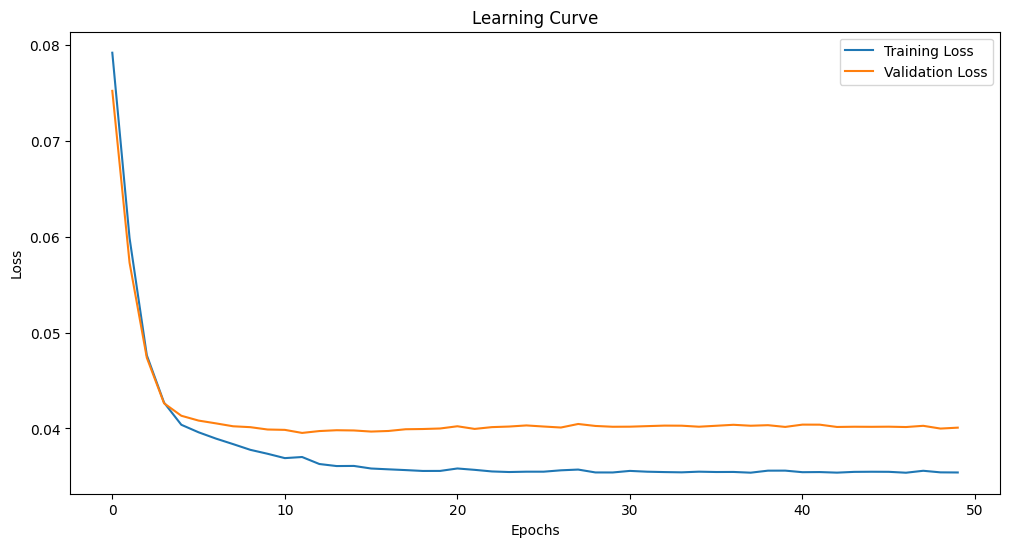

4/4 [==============================] - 0s 3ms/step
Training Evaluation: 0.27 RMSE
Testing Evaluation: 0.29 RMSE


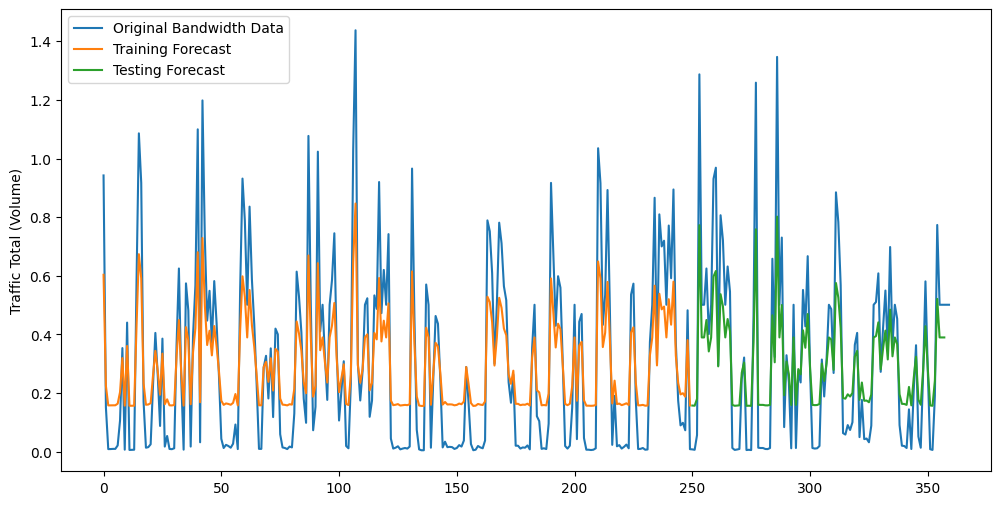

In [11]:
bandwidth_model = Sequential()
bandwidth_model.add(LSTM(50, input_shape=(1, history_length)))
bandwidth_model.add(Dense(1))
bandwidth_model.compile(loss='mean_squared_error', optimizer='adam')

history = bandwidth_model.fit(train_input, train_target, epochs=50,
                              batch_size=16, verbose=2,
                              validation_data=(test_input, test_target))


# Save the model
bandwidth_model.save("bandwidth_model.h5")

# Plotting the learning curve
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Learning Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Forecasting
train_forecast = bandwidth_model.predict(train_input)
test_forecast = bandwidth_model.predict(test_input)

# Inverse transform the predictions and targets
train_forecast = scaler.inverse_transform(train_forecast)
train_target = scaler.inverse_transform([train_target])
test_forecast = scaler.inverse_transform(test_forecast)
test_target = scaler.inverse_transform([test_target])

# Calculate RMSE for training and testing data
train_evaluation = np.sqrt(mean_squared_error(train_target[0], train_forecast[:, 0]))
print('Training Evaluation: %.2f RMSE' % (train_evaluation))
test_evaluation = np.sqrt(mean_squared_error(test_target[0], test_forecast[:, 0]))
print('Testing Evaluation: %.2f RMSE' % (test_evaluation))

# Original bandwidth data plotting
plt.figure(figsize=(12, 6))
plt.plot(bandwidth, label='Original Bandwidth Data')
plt.plot([item for item in train_forecast], label='Training Forecast')
plt.plot([item + len(train_forecast) for item in range(len(test_forecast))], test_forecast, label='Testing Forecast')
plt.ylabel('Traffic Total (Volume)')
plt.legend()
plt.show()

#RNN MODEL

Epoch 1/50
16/16 - 1s - loss: 0.0710 - val_loss: 0.0473 - 1s/epoch - 85ms/step
Epoch 2/50
16/16 - 0s - loss: 0.0427 - val_loss: 0.0407 - 87ms/epoch - 5ms/step
Epoch 3/50
16/16 - 0s - loss: 0.0391 - val_loss: 0.0396 - 86ms/epoch - 5ms/step
Epoch 4/50
16/16 - 0s - loss: 0.0373 - val_loss: 0.0397 - 86ms/epoch - 5ms/step
Epoch 5/50
16/16 - 0s - loss: 0.0362 - val_loss: 0.0392 - 85ms/epoch - 5ms/step
Epoch 6/50
16/16 - 0s - loss: 0.0355 - val_loss: 0.0395 - 87ms/epoch - 5ms/step
Epoch 7/50
16/16 - 0s - loss: 0.0354 - val_loss: 0.0396 - 86ms/epoch - 5ms/step
Epoch 8/50
16/16 - 0s - loss: 0.0354 - val_loss: 0.0398 - 78ms/epoch - 5ms/step
Epoch 9/50
16/16 - 0s - loss: 0.0355 - val_loss: 0.0398 - 86ms/epoch - 5ms/step
Epoch 10/50
16/16 - 0s - loss: 0.0353 - val_loss: 0.0398 - 75ms/epoch - 5ms/step
Epoch 11/50
16/16 - 0s - loss: 0.0354 - val_loss: 0.0402 - 75ms/epoch - 5ms/step
Epoch 12/50
16/16 - 0s - loss: 0.0358 - val_loss: 0.0398 - 90ms/epoch - 6ms/step
Epoch 13/50
16/16 - 0s - loss: 0.0355 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4/4 [==============================] - 0s 2ms/step
Training Evaluation: 0.27 RMSE
Testing Evaluation: 0.29 RMSE


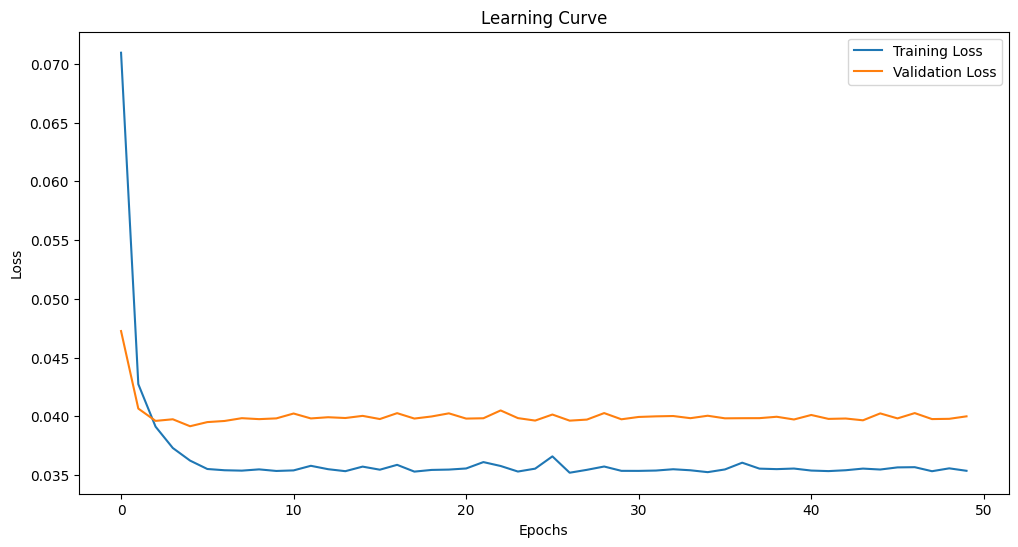

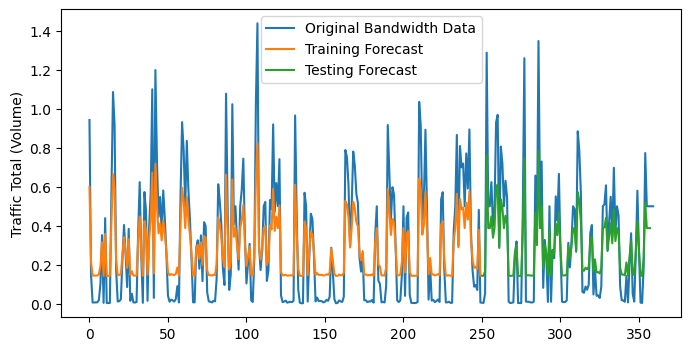

In [13]:
bandwidth_model = Sequential()
bandwidth_model.add(SimpleRNN(50, input_shape=(1, history_length)))
bandwidth_model.add(Dense(1))
bandwidth_model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model and capture training history
history = bandwidth_model.fit(train_input, train_target, validation_data=(test_input, test_target),
                              epochs=50, batch_size=16, verbose=2)

# Save the model
bandwidth_model.save("bandwidth_model_rnn.h5")

# Forecasting
train_forecast = bandwidth_model.predict(train_input)
test_forecast = bandwidth_model.predict(test_input)

# Invert predictions
train_forecast = scaler.inverse_transform(train_forecast)
train_target = scaler.inverse_transform([train_target])
test_forecast = scaler.inverse_transform(test_forecast)
test_target = scaler.inverse_transform([test_target])

# Calculate RMSE
train_evaluation = np.sqrt(mean_squared_error(train_target[0], train_forecast[:, 0]))
print('Training Evaluation: %.2f RMSE' % (train_evaluation))
test_evaluation = np.sqrt(mean_squared_error(test_target[0], test_forecast[:, 0]))
print('Testing Evaluation: %.2f RMSE' % (test_evaluation))

# Plotting the learning curve
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.legend()
plt.show()

# Plotting the forecast results
plt.figure(figsize=(8, 4))
plt.plot(bandwidth, label='Original Bandwidth Data')
plt.plot([item for item in train_forecast], label='Training Forecast')
plt.plot([item + len(train_forecast) for item in range(len(test_forecast))], test_forecast, label='Testing Forecast')
plt.ylabel('Traffic Total (Volume)')
plt.legend()
plt.show()

#Usage Model

In [ ]:
dataset

SyntaxError: unterminated string literal (detected at line 1) (<ipython-input-38-54ba7970dc9a>, line 1)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
import datetime

# Load model
bandwidth_model = load_model("bandwidth_model.h5")

# Function to create input sequence ใช้สำหรับสร้างลำดับข้อมูลเข้าสู่โมเดลที่ใช้ในการทำนาย
def create_input_sequence(data, history_length=1):
    input_sequence = data[-history_length:].reshape(1, history_length, 1)
    return input_sequence

# Function to predict future steps การทำนาย 3 ขั้นตอน
def predict_future(model, input_sequence, future_steps):
    forecast = []
    current_sequence = input_sequence.copy()
    for _ in range(future_steps):
        future_data = model.predict(current_sequence)[0, 0]
        forecast.append(future_data)
        current_sequence = np.roll(current_sequence, -1, axis=1)
        current_sequence[0, -1, 0] = future_data
    return forecast

# Extract traffic data from dataset แปลงข้อมูลเป็นชนิดข้อมูลที่เหมาะสมสำหรับการใช้งานกับโมเดล โดยใช้คอลัมน์ Traffic Total (Volume)' และข้อมูลจะถูกแปลงเป็นชนิดข้อมูล 'float32'
traffic_data = dataset['Traffic Total (Volume)'].values.astype('float32')

# Normalize traffic data ปรับค่าข้อมูล (traffic data) เพื่อให้มีการกระจายค่าอยู่ในช่วงระหว่าง 0 ถึง 1 โดย
scaler = MinMaxScaler(feature_range=(0, 1))
normalized_traffic_data = scaler.fit_transform(traffic_data.reshape(-1, 1))

# Organize data into input sequences คือลำดับข้อมูลที่เหมาะสำหรับนำเข้าสู่โมเดล ที่ถูกสร้างจากข้อมูลที่ถูกปรับค่าแล้วมีความยาวของประวัติเป็น 1 ชั่วโมง
history_length = 1
input_sequence = create_input_sequence(normalized_traffic_data, history_length)

# Predict next 3 days
future_steps = 8
forecast = predict_future(bandwidth_model, input_sequence, future_steps)

# Inverse transform forecasted data การใช้ inverse transform จะทำให้ข้อมูลที่ถูกปรับค่าแล้วกลับมาอยู่ในช่วงของข้อมูลเดิมที่ไม่ได้ถูกปรับค่า
forecast = scaler.inverse_transform(np.array(forecast).reshape(-1, 1))

# Extract the last date from the dataset
last_date = dataset['Date Time'].iloc[-1]
last_date = pd.to_datetime(last_date).strftime('%Y-%m-%d %H:%M:%S')
last_date = datetime.datetime.strptime(last_date, '%Y-%m-%d %H:%M:%S')

# Generate predicted dates for the next 3 days
predicted_dates = [last_date + datetime.timedelta(days=i) for i in range(1, future_steps + 1)]
# Print forecasted values
print("Forecast for the next 5 steps:")
for i, data in enumerate(forecast):
    print(f"Day {i+1}: {data[0]}")


# Plotting the forecast
plt.figure(figsize=(10, 6))
plt.plot(dataset['Date Time'], traffic_data, label='Original Bandwidth Data')
plt.plot(predicted_dates, forecast, label='Forecast', marker='o')
plt.xlabel('Date')
plt.ylabel('Traffic Total (Volume)')
plt.title('Bandwidth Forecast for Next 8 stpes')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


OSError: No file or directory found at bandwidth_model.h5